In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore


In [34]:
df = pd.read_csv("CarPrice_Assignment.csv")   # import csv file

In [35]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [36]:
df.shape # Shape of dataset (rows, cols)

(205, 26)

In [37]:
df.info() # Data types + non-null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [38]:
# Statistical summary (numerical columns only)
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [39]:
## Data Cleaning

In [40]:
# 1. Null count with percentage
null_counts = df.isnull().sum()
null_percentage = (null_counts/len(df))*100
print(pd.DataFrame({"Null Count": null_counts, "Null %": null_percentage}))

                  Null Count  Null %
car_ID                     0     0.0
symboling                  0     0.0
CarName                    0     0.0
fueltype                   0     0.0
aspiration                 0     0.0
doornumber                 0     0.0
carbody                    0     0.0
drivewheel                 0     0.0
enginelocation             0     0.0
wheelbase                  0     0.0
carlength                  0     0.0
carwidth                   0     0.0
carheight                  0     0.0
curbweight                 0     0.0
enginetype                 0     0.0
cylindernumber             0     0.0
enginesize                 0     0.0
fuelsystem                 0     0.0
boreratio                  0     0.0
stroke                     0     0.0
compressionratio           0     0.0
horsepower                 0     0.0
peakrpm                    0     0.0
citympg                    0     0.0
highwaympg                 0     0.0
price                      0     0.0


In [41]:
# Sort table  by price
df = df.sort_values(by="price", ascending=True)
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
138,139,2,subaru,gas,std,two,hatchback,fwd,front,93.7,...,97,2bbl,3.62,2.36,9.0,69,4900,31,36,5118.0
18,19,2,chevrolet impala,gas,std,two,hatchback,fwd,front,88.4,...,61,2bbl,2.91,3.03,9.5,48,5100,47,53,5151.0
50,51,1,maxda rx3,gas,std,two,hatchback,fwd,front,93.1,...,91,2bbl,3.03,3.15,9.0,68,5000,30,31,5195.0
150,151,1,toyota corona mark ii,gas,std,two,hatchback,fwd,front,95.7,...,92,2bbl,3.05,3.03,9.0,62,4800,35,39,5348.0
76,77,2,mitsubishi mirage,gas,std,two,hatchback,fwd,front,93.7,...,92,2bbl,2.97,3.23,9.4,68,5500,37,41,5389.0


In [42]:
# data preparation

In [43]:
# split the car name into diffrent string and return the first string i.e carcompany name

df['carCompany'] = df['CarName'].apply(lambda x: x.split(' ')[0]) 

In [44]:
# check unique values
df['carCompany'].unique()

array(['subaru', 'chevrolet', 'maxda', 'toyota', 'mitsubishi', 'honda',
       'Nissan', 'plymouth', 'dodge', 'nissan', 'mazda', 'isuzu',
       'vokswagen', 'volkswagen', 'renault', 'vw', 'saab', 'peugeot',
       'volvo', 'alfa-romero', 'audi', 'toyouta', 'bmw', 'mercury',
       'porsche', 'buick', 'jaguar', 'porcshce'], dtype=object)

In [45]:
# Replace descrepancies values
df['carCompany'] = df['carCompany'].replace(["toyouta" , "Nissan","maxda","porcshce","vokswagen","vw"],
                                            ["toyota" , "nissan", "mazda","porsche" , "volkswagen","volkswagen"])

In [46]:
df['carCompany'].unique()

array(['subaru', 'chevrolet', 'mazda', 'toyota', 'mitsubishi', 'honda',
       'nissan', 'plymouth', 'dodge', 'isuzu', 'volkswagen', 'renault',
       'saab', 'peugeot', 'volvo', 'alfa-romero', 'audi', 'bmw',
       'mercury', 'porsche', 'buick', 'jaguar'], dtype=object)

In [47]:
df_copy = df.copy()

In [48]:
#  Z-score for price col
z_scores = np.abs(zscore(df_copy["price"]))
outliers1 = z_scores > 3

print("Outliers count:", outliers1.sum())

Outliers count: 3


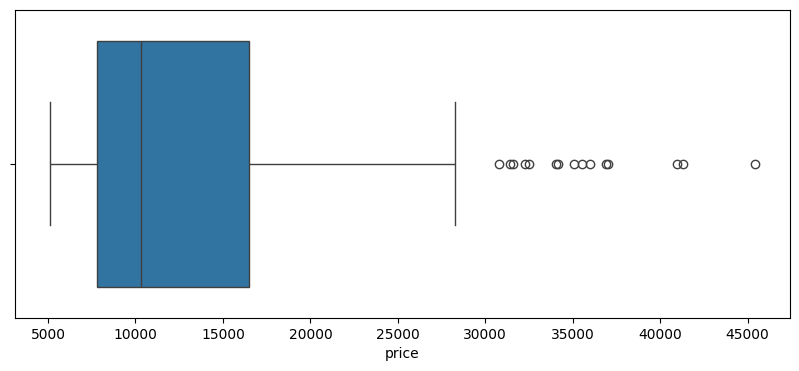

In [49]:
# Boxplot for price
plt.figure(figsize=(10,4))
sns.boxplot(x=df_copy["price"])

plt.show()

In [50]:
Q1 = df_copy["price"].quantile(0.25)   # 25th percentile
Q3 = df_copy["price"].quantile(0.75)   # 75th percentile
IQR = Q3 - Q1                     # Interquartile Range

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers2 = df_copy[(df_copy["price"] < lower_bound) | (df_copy["price"] > upper_bound)]


In [51]:
len(outliers2)

15

In [52]:
outliers2.index

Index([15, 129, 70, 47, 126, 127, 71, 72, 48, 49, 17, 128, 73, 16, 74], dtype='int64')

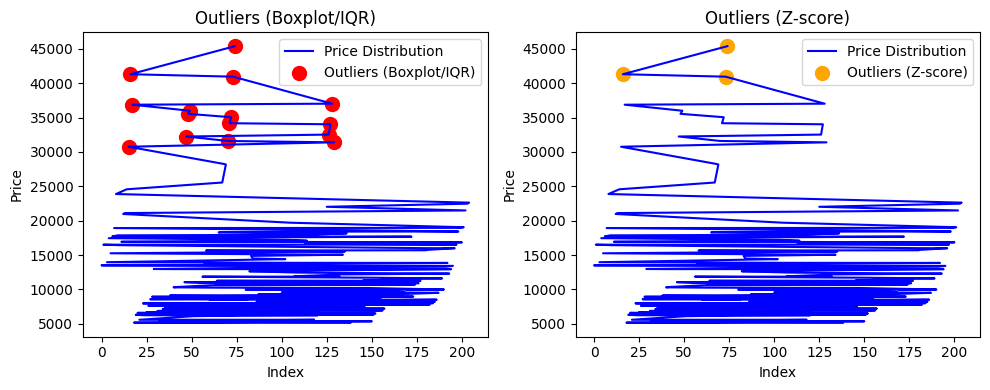

In [53]:
fig, axes = plt.subplots(1, 2, figsize=(10,4))   # 1 row, 2 columns

# --- Boxplot/IQR Outliers ---
axes[0].plot(df_copy.index, df_copy["price"], label="Price Distribution", color="blue")
axes[0].scatter(outliers2.index, outliers2["price"], color="red", label="Outliers (Boxplot/IQR)", s=100)
axes[0].set_title("Outliers (Boxplot/IQR)")
axes[0].set_xlabel("Index")
axes[0].set_ylabel("Price")
axes[0].legend()

# --- Z-score Outliers ---
axes[1].plot(df_copy.index, df_copy["price"], label="Price Distribution", color="blue")
axes[1].scatter(df_copy.index[outliers1], 
                df_copy["price"][outliers1], 
                color="orange", label="Outliers (Z-score)", s=100)
axes[1].set_title("Outliers (Z-score)")
axes[1].set_xlabel("Index")
axes[1].set_ylabel("Price")
axes[1].legend()

plt.tight_layout()
plt.show()

In [54]:
df_copy = df_copy.drop(outliers2.index)

In [55]:
df_copy

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,carCompany
138,139,2,subaru,gas,std,two,hatchback,fwd,front,93.7,...,2bbl,3.62,2.36,9.0,69,4900,31,36,5118.0,subaru
18,19,2,chevrolet impala,gas,std,two,hatchback,fwd,front,88.4,...,2bbl,2.91,3.03,9.5,48,5100,47,53,5151.0,chevrolet
50,51,1,maxda rx3,gas,std,two,hatchback,fwd,front,93.1,...,2bbl,3.03,3.15,9.0,68,5000,30,31,5195.0,mazda
150,151,1,toyota corona mark ii,gas,std,two,hatchback,fwd,front,95.7,...,2bbl,3.05,3.03,9.0,62,4800,35,39,5348.0,toyota
76,77,2,mitsubishi mirage,gas,std,two,hatchback,fwd,front,93.7,...,2bbl,2.97,3.23,9.4,68,5500,37,41,5389.0,mitsubishi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,...,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.0,audi
14,15,1,bmw z4,gas,std,four,sedan,rwd,front,103.5,...,mpfi,3.31,3.19,9.0,121,4250,20,25,24565.0,bmw
67,68,-1,buick electra 225 custom,diesel,turbo,four,sedan,rwd,front,110.0,...,idi,3.58,3.64,21.5,123,4350,22,25,25552.0,buick
69,70,0,buick century,diesel,turbo,two,hardtop,rwd,front,106.7,...,idi,3.58,3.64,21.5,123,4350,22,25,28176.0,buick


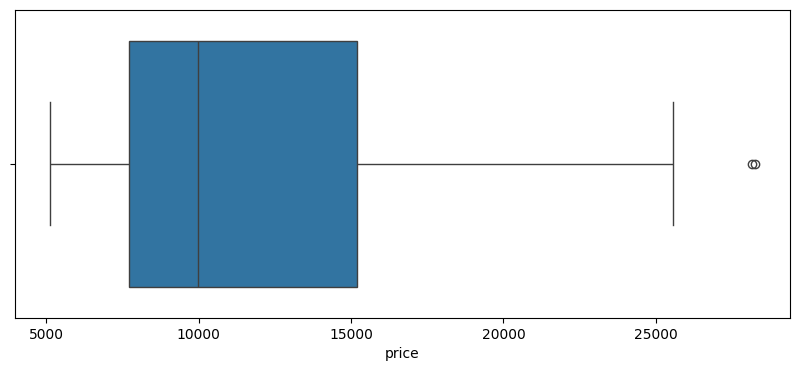

In [56]:
# Boxplot for price
plt.figure(figsize=(10,4))
sns.boxplot(x=df_copy["price"])

plt.show()

In [57]:
Q1 = df_copy["price"].quantile(0.25)   # 25th percentile
Q3 = df_copy["price"].quantile(0.75)   # 75th percentile
IQR = Q3 - Q1                     # Interquartile Range

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers3 = df_copy[(df_copy["price"] < lower_bound) | (df_copy["price"] > upper_bound)]


In [58]:
len(outliers3)

2

In [59]:
outliers3

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,carCompany
69,70,0,buick century,diesel,turbo,two,hardtop,rwd,front,106.7,...,idi,3.58,3.64,21.5,123,4350,22,25,28176.0,buick
68,69,-1,buick century luxus (sw),diesel,turbo,four,wagon,rwd,front,110.0,...,idi,3.58,3.64,21.5,123,4350,22,25,28248.0,buick


In [60]:
df_copy = df_copy.drop(outliers3.index)

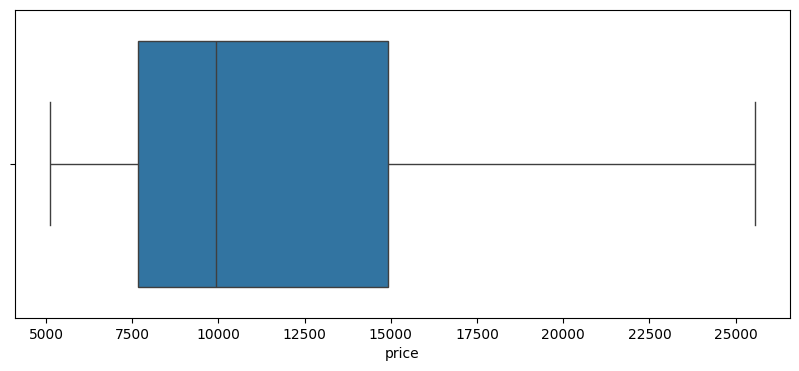

In [61]:
# Boxplot for price
plt.figure(figsize=(10,4))
sns.boxplot(x=df_copy["price"])

plt.show()

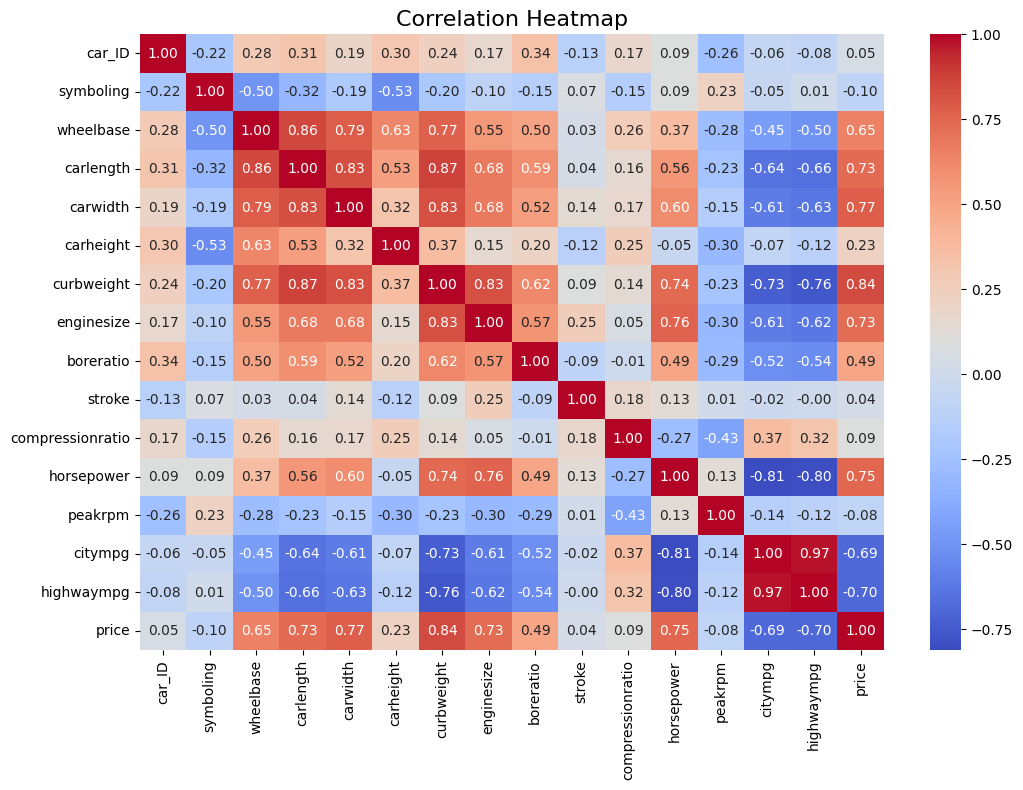

In [62]:
plt.figure(figsize=(12,8))

# selects only numeric cols
numeric_df = df_copy.select_dtypes(include=[np.number])  

sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

According to the above correlation matrix I have forund certain columns showed negligible correlation values (close to 0), indicating that they 
contributed very little to explaining car prices. 


In [63]:
# columns to drop from df_copy
drop_cols = ["car_ID","symboling", "carheight", "stroke", "compressionratio", "peakrpm"]

# drop from df_copy
df_copy = df_copy.drop(columns=drop_cols)

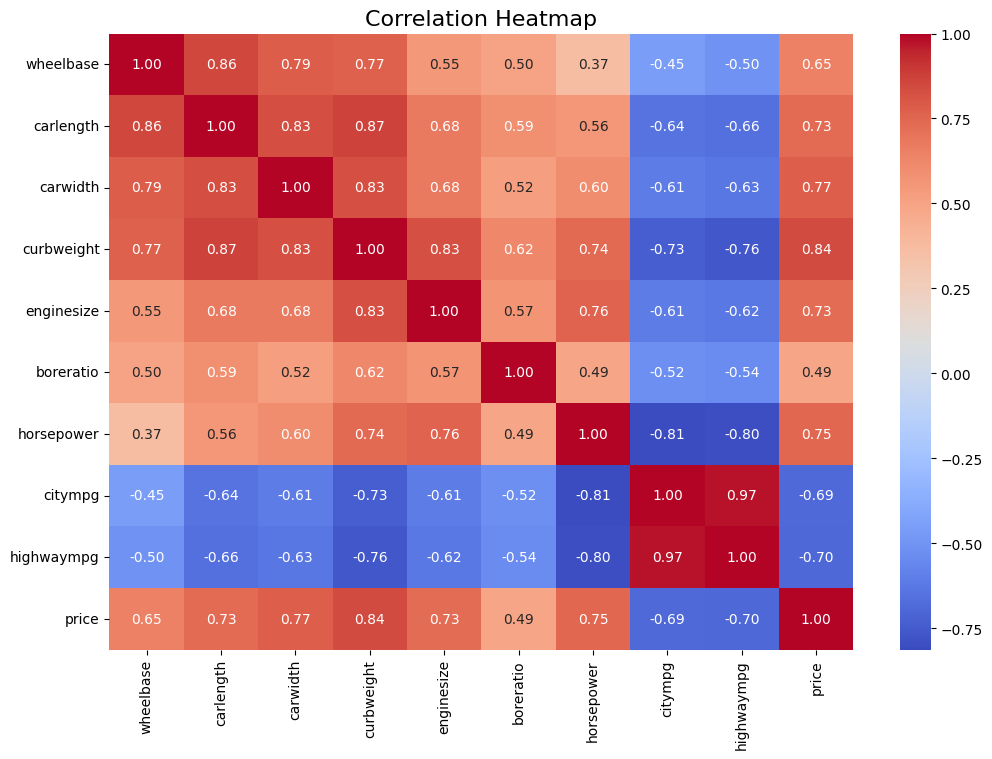

In [64]:
plt.figure(figsize=(12,8))
numeric_df = df_copy.select_dtypes(include=[np.number])  
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

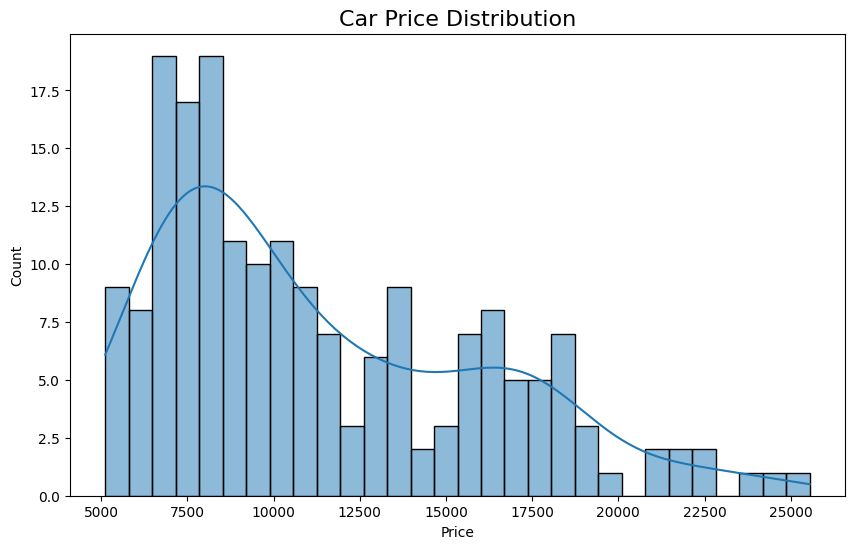

In [65]:
# Price Distribution (Histogram + KDE curve)
plt.figure(figsize=(10,6))
sns.histplot(df_copy['price'], bins=30, kde=True)
plt.title("Car Price Distribution", fontsize=16)
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()

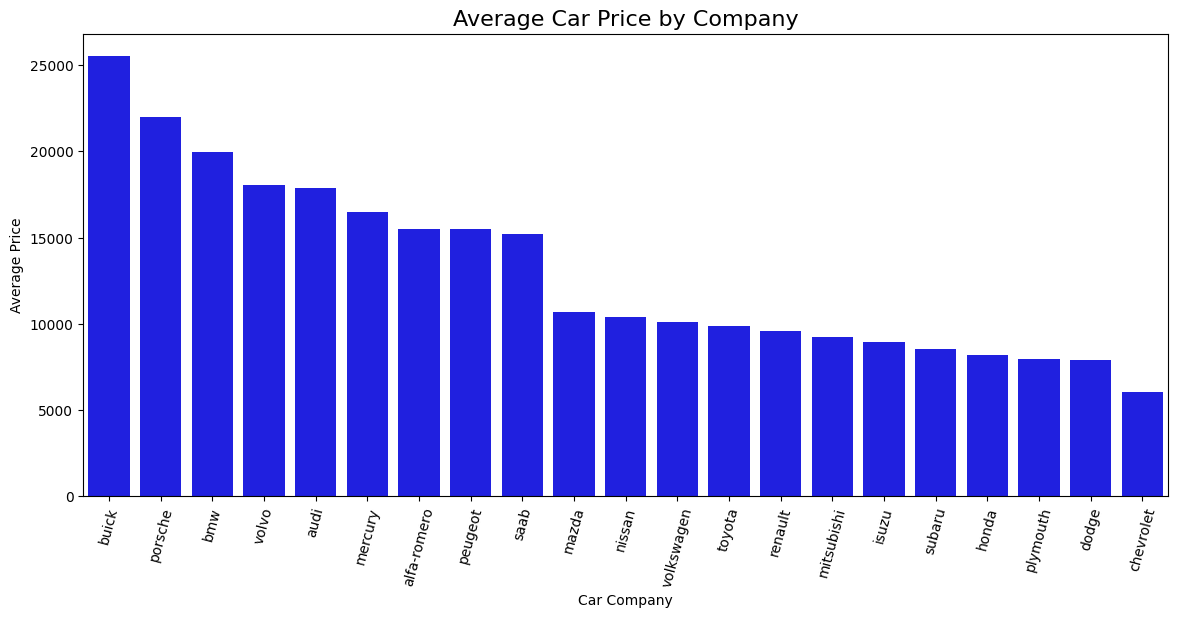

In [66]:
# Company wise average price
plt.figure(figsize=(14,6))

order = df_copy.groupby("carCompany")["price"].mean().sort_values(ascending=False).index
sns.barplot(x="carCompany", y="price", data=df_copy, color="blue", errorbar=None, estimator=np.mean, order=order)

plt.xticks(rotation=75)
plt.title("Average Car Price by Company", fontsize=16)
plt.xlabel("Car Company")
plt.ylabel("Average Price")
plt.show()

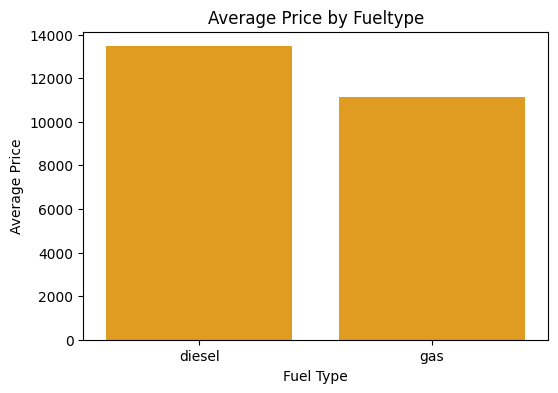

In [67]:
# Average Price by Fueltype
plt.figure(figsize=(6,4))
order = df_copy.groupby("fueltype")["price"].mean().sort_values(ascending=False).index
sns.barplot(x='fueltype', y='price', data=df_copy,estimator=np.mean,order=order , color="orange",errorbar =None)
plt.title("Average Price by Fueltype")
plt.xlabel("Fuel Type")
plt.ylabel("Average Price")
plt.show()

In [68]:
df_copy.fueltype.value_counts()

fueltype
gas       171
diesel     17
Name: count, dtype: int64

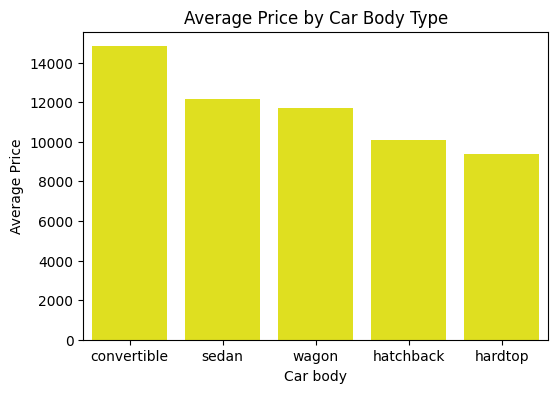

In [69]:
# Average Price by Carbody
plt.figure(figsize=(6,4))
order = df_copy.groupby("carbody")["price"].mean().sort_values(ascending=False).index
sns.barplot(x='carbody', y='price', data=df_copy, color="yellow",order=order,estimator=np.mean,errorbar=None)
plt.title("Average Price by Car Body Type")
plt.xlabel("Car body")
plt.ylabel("Average Price")
plt.show()

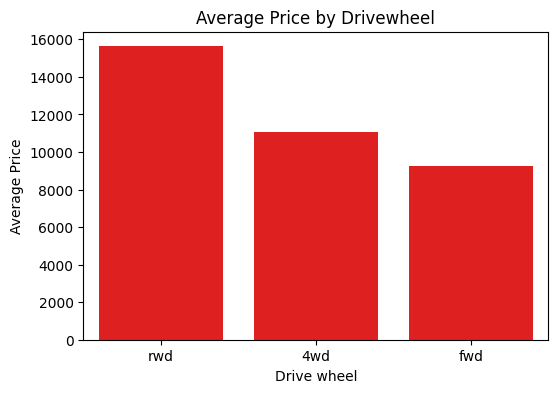

In [70]:
# Average Price by Drivewheel
plt.figure(figsize=(6,4))
order = df_copy.groupby("drivewheel")["price"].mean().sort_values(ascending=False).index
sns.barplot(x='drivewheel', y='price', data=df_copy , estimator=np.mean, errorbar=None, order=order,color="red")
plt.title("Average Price by Drivewheel")
plt.xlabel("Drive wheel")
plt.ylabel("Average Price")
plt.show()

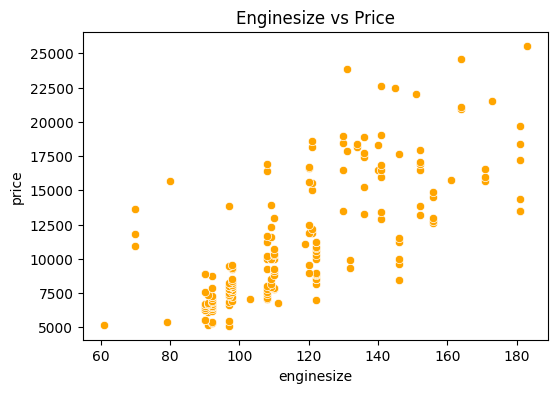

In [71]:
# Enginesize vs Price
plt.figure(figsize=(6,4))
sns.scatterplot(x='enginesize', y='price', data=df_copy,color="orange")
plt.title("Enginesize vs Price")
plt.show()

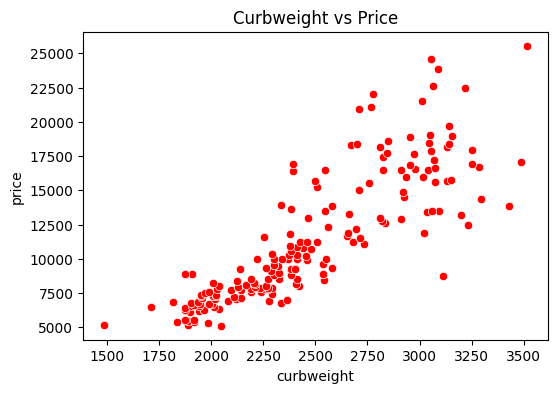

In [72]:
# Curbweight vs Price
plt.figure(figsize=(6,4))
sns.scatterplot(x='curbweight', y='price', data=df_copy,color="red")
plt.title("Curbweight vs Price")
plt.show()

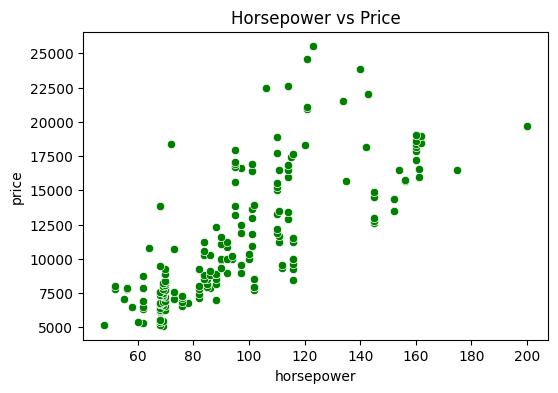

In [73]:
# Horsepower vs Price
plt.figure(figsize=(6,4))
sns.scatterplot(x='horsepower', y='price', data=df_copy, color="green")
plt.title("Horsepower vs Price")
plt.show()